In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
plt.style.use('paper')

In [3]:
grav = 'GR_b64n512'
NFW_f = 0.02
rs_f = 1.0

In [4]:
d = pd.read_csv("./output/result.nfw.csv")\
    .dropna()

In [5]:
_d = d[
    (d['grav'] == grav) &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

x, y = _d['rho_f'], _d['rho_s']

In [6]:
def f_0(x, a):
    return a + x

popt_0, _ = curve_fit(f_0, x, y)

print(sum((f_0(x, *popt_0) - y)**2.0) / float(len(y) - len(popt_0)))

0.00447909018989842


In [7]:
def f_1(x, a, b):
    return a + b*x

popt_1, _ = curve_fit(f_1, x, y)

print(sum((f_1(x, *popt_1) - y)**2.0) / float(len(y) - len(popt_1)))

0.0037608046087556834


In [8]:
def f_2(x, a, b, c):
    return a + b*x + c*x*x

popt_2, _ = curve_fit(f_2, x, y)

print(sum((f_2(x, *popt_2) - y)**2.0) / float(len(y) - len(popt_2)))

0.0037925795250344516


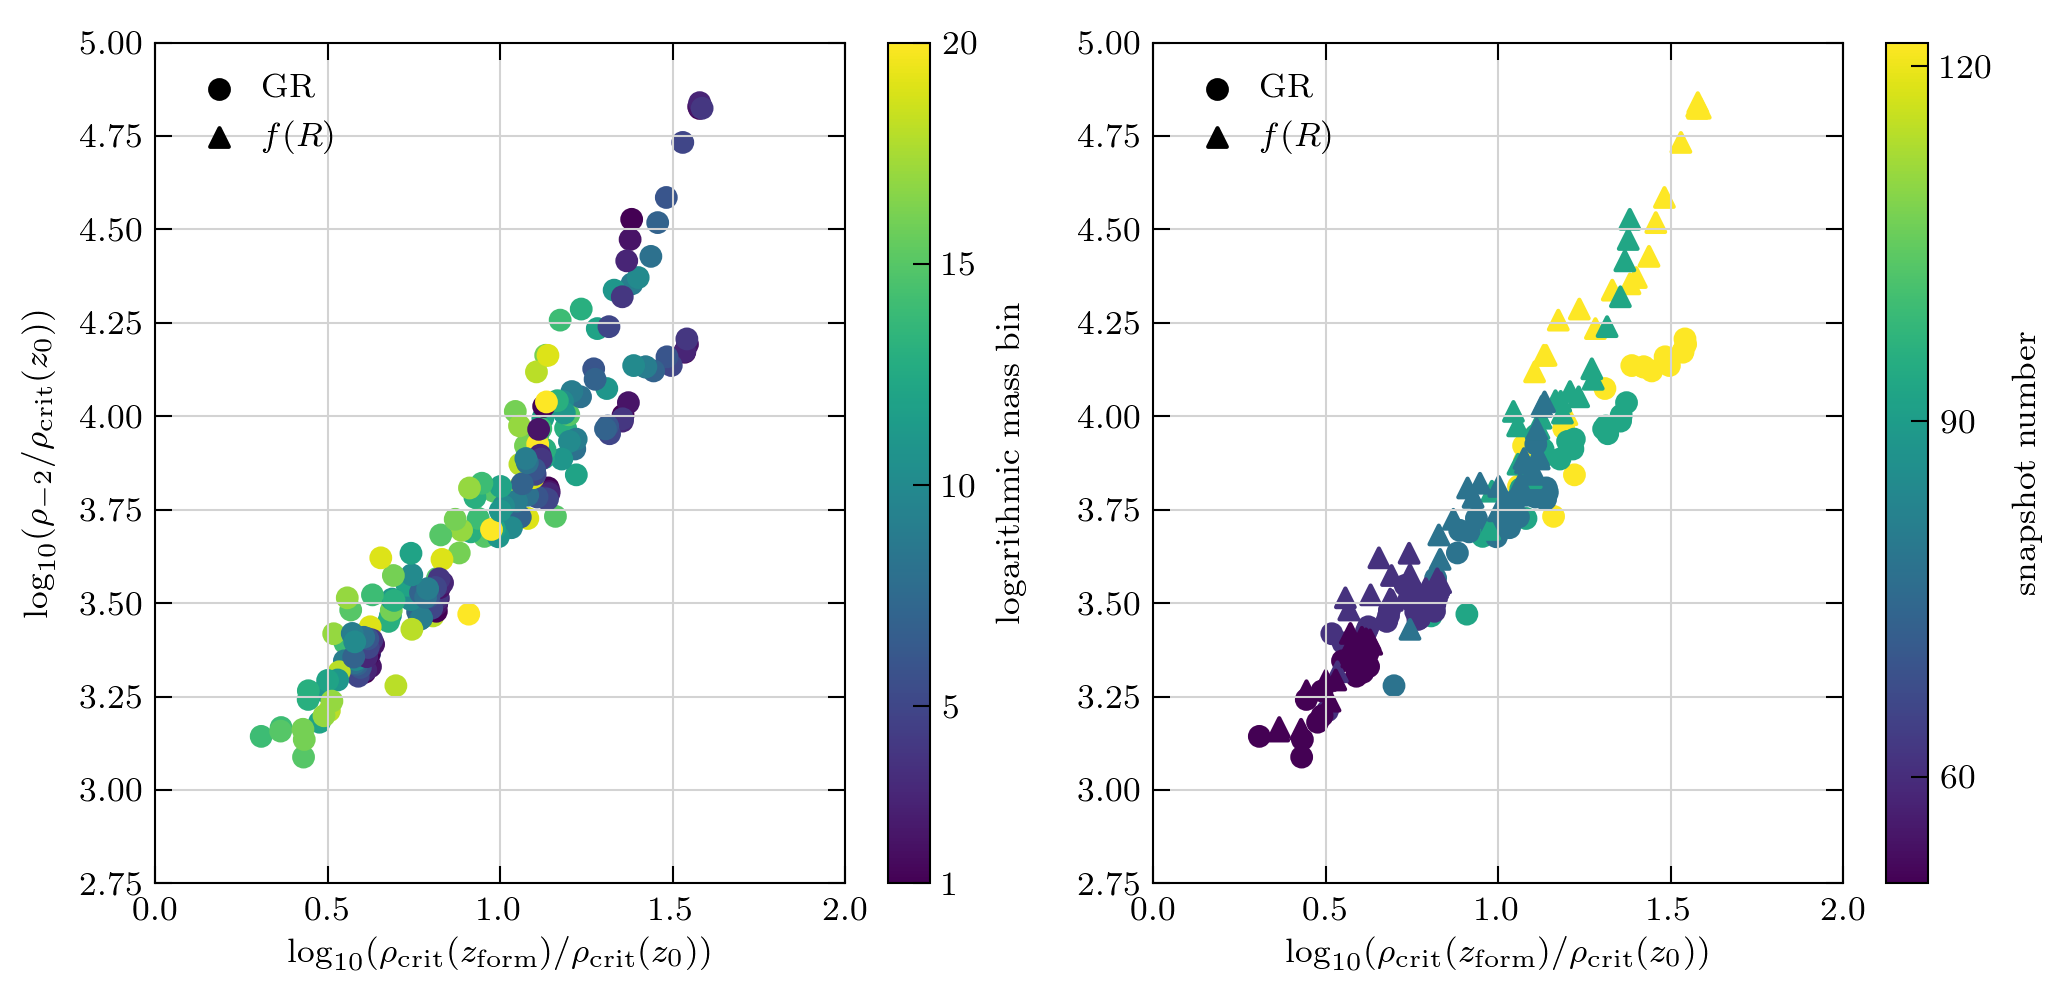

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7.0, 3.4))

_d = d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

ax[0].scatter(x=_d['rho_f'], y=_d['rho_s'], marker='o', c=_d['bin'], s=20, label=None)
ax[1].scatter(x=_d['rho_f'], y=_d['rho_s'], marker='o', c=_d['snap'], s=20, label=None)

_d = d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
]

fig.colorbar(
    ax[0].scatter(x=_d['rho_f'], y=_d['rho_s'], marker='o', c=_d['bin'], s=20, label=None),
    label=r'logarithmic mass bin',
    ticks=[1, 5, 10, 15, 20],
    ax=ax[0],
)
fig.colorbar(
    ax[1].scatter(x=_d['rho_f'], y=_d['rho_s'], marker='^', c=_d['snap'], s=20, label=None),
    label=r'snapshot number',
    ticks=[60, 90, 120],
    ax=ax[1],
)

ax[0].set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")

for a in ax:
    a.set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
    a.set_xlim((0.0, 2.0))
    a.set_ylim((2.75, 5))
    a.scatter([], [], c='k', s=20, marker='o', label=r'GR')
    a.scatter([], [], c='k', s=20, marker='^', label=r'$f(R)$')
    a.legend()

fig.tight_layout()

# fig.savefig('./plots/rhorho_all.pdf')

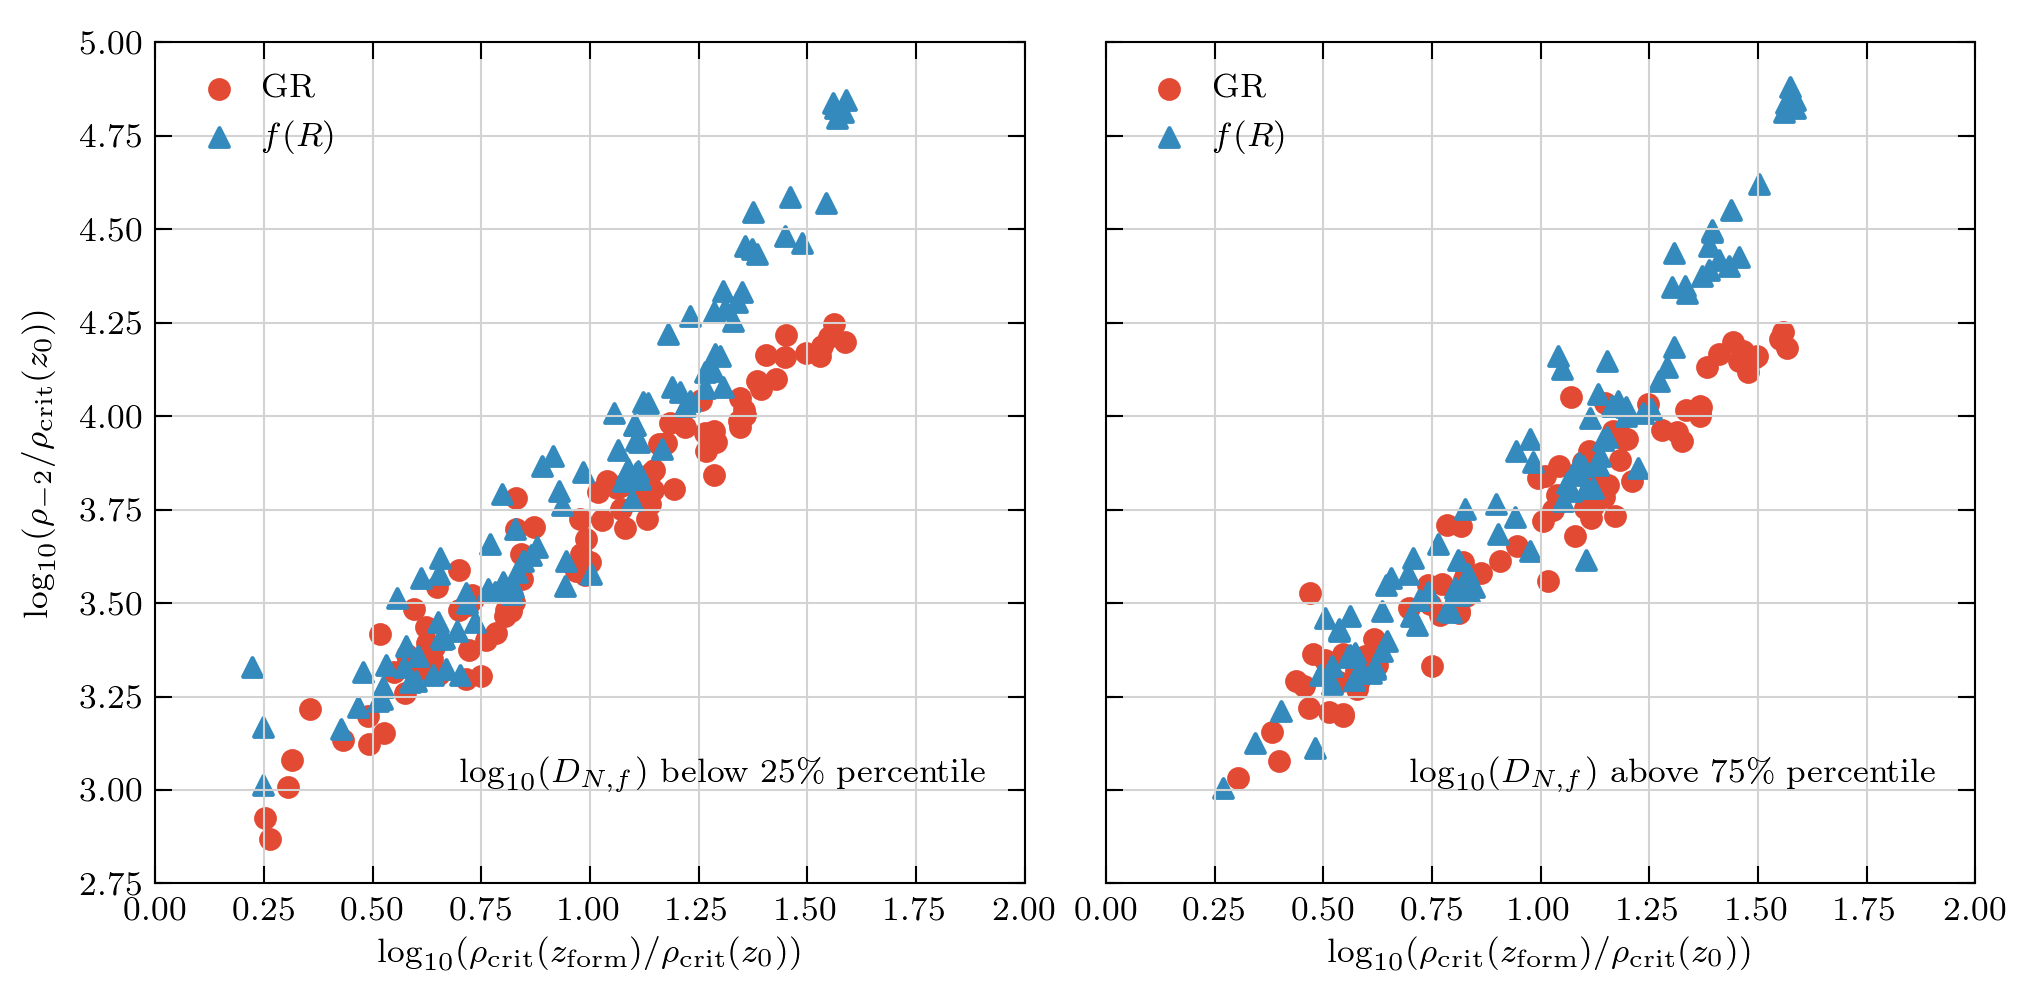

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6.8, 3.4))
# fig.suptitle(r"$rs_{f}=%.2f, f=%.2f$" % (rs_f, NFW_f))

d = pd.read_csv("./under.csv").dropna()
d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[0], kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label='GR')
d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[0], kind='scatter', x='rho_f', y='rho_s', marker='^', c='C1', label=r'$f(R)$')
ax[0].text(0.7, 3.0, r"$\log_{10}(D_{N,f})$ below 25\% percentile")

d = pd.read_csv("./over.csv").dropna()
d[
    (d['grav'] == 'GR_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[1], kind='scatter', x='rho_f', y='rho_s', marker='o', c='C0', label='GR')
d[
    (d['grav'] == 'fr6_b64n512') &
    (d['f'] == NFW_f) &
    (d['rs_f'] == rs_f)
].plot(ax=ax[1], kind='scatter', x='rho_f', y='rho_s', marker='^', c='C1', label=r'$f(R)$')
ax[1].text(0.7, 3.0, r"$\log_{10}(D_{N,f})$ above 75\% percentile")

# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), np.log10(400)), label='C=400', c='C2')
# ax.plot(np.linspace(0, 2), f_0(np.linspace(0, 2), *popt_0), label='C=%d' % 10**popt_0[0], c='C3')
# ax.plot(np.linspace(0, 2), f_1(np.linspace(0, 2), *popt_1), label='ax+b', c='C2')

for a in ax:
    a.set_xlim((0.0, 2.0))
    a.set_ylim((2.75, 5.0))
    a.set_xlabel(r"$\log_{10}(\rho_{\mathrm{crit}}(z_{\mathrm{form}}) / \rho_{\mathrm{crit}}(z_{0}))$")
    a.set_ylabel(r"$\log_{10}(\rho_{-2} / \rho_{\mathrm{crit}}(z_{0}))$")

fig.tight_layout()

# plt.savefig("./plots/rhorho_cut_bydnf.pdf")

In [11]:
# from plotnine import *
# import plotnine

In [12]:
# plotnine.options.figure_size = 8, 12

# g = (ggplot(
#     d[d['f'] == NFW_f],
#     aes(
#         x="rho_f",
#         y='rho_s',
#     )) +
#     geom_point(aes(
#         color='snap',
# #         size='bin',
# #         shape='grav',
#     )) +
#     scale_color_desaturate() +
#     facet_grid(['rs_f', 'grav']))

# _ = g.draw()